# 20기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
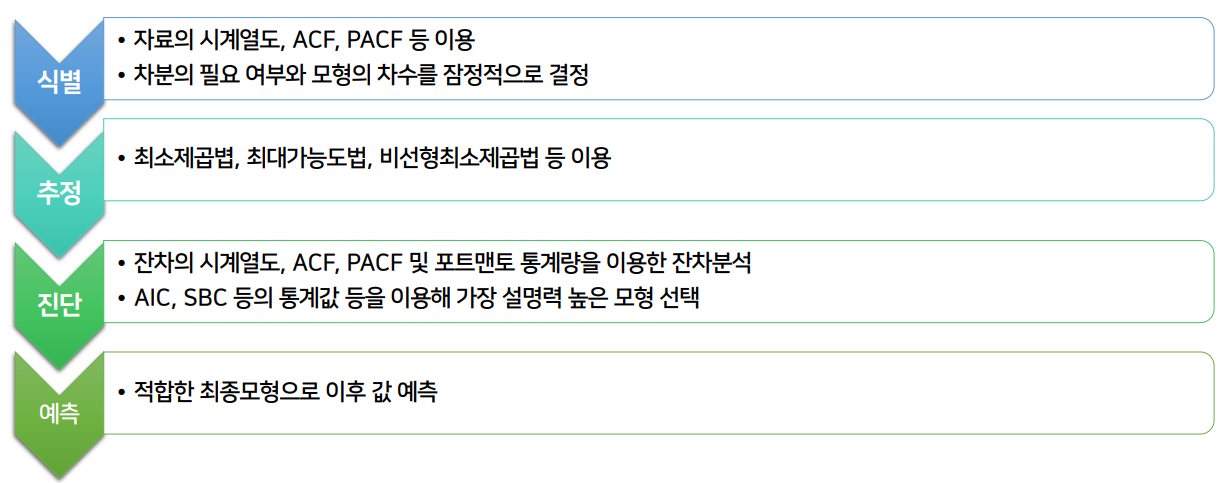

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMAResults

C:\Users\admin\AppData\Local\Temp\ipykernel_35724\2309472473.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## 데이터 불러오기

In [2]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


In [3]:
samsung_df = samsung_df.asfreq('B').fillna(method='ffill')

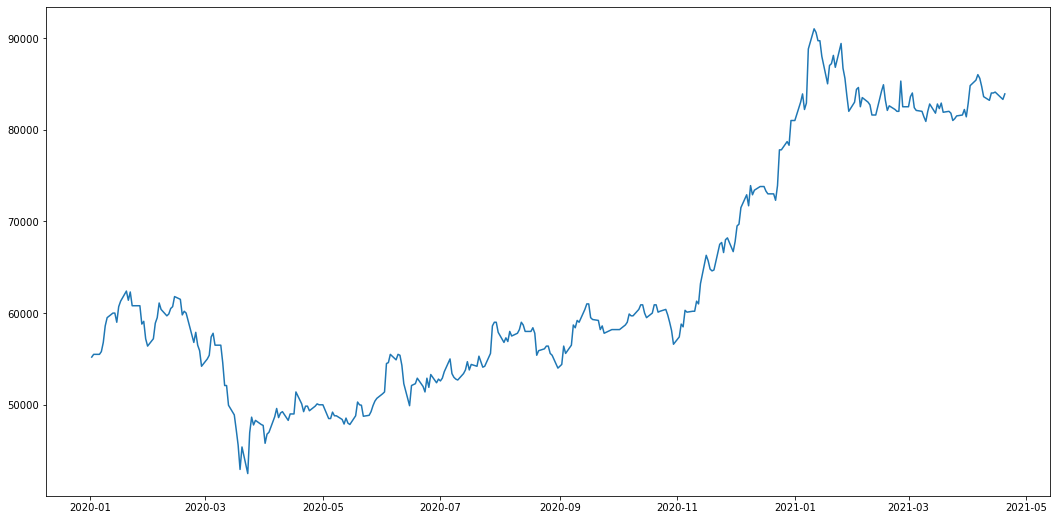

In [4]:
plt.figure(figsize=(18,9))
plt.plot(samsung_df.index, samsung_df["price"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Price')
plt.show()

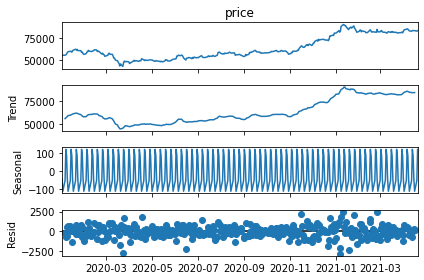

In [5]:
a = seasonal_decompose(samsung_df["price"], model = "add")
a.plot();

<AxesSubplot:xlabel='day'>

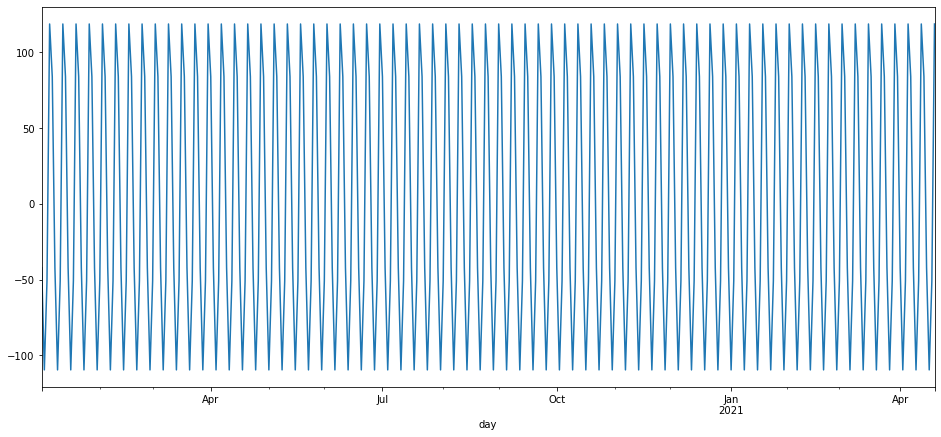

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot()

## ARIMA Forecast

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
train_data = samsung_df[:len(samsung_df)-12]
test_data = samsung_df[len(samsung_df)-12:]

In [9]:
arima_model = SARIMAX(train_data['price'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                      price   No. Observations:                  327
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -2774.728
Date:                                    Wed, 30 Aug 2023   AIC                           5571.455
Time:                                            13:47:44   BIC                           5613.111
Sample:                                        01-02-2020   HQIC                          5588.078
                                             - 04-02-2021                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5261      2.689     -0.196      0.845      -5.796       4.744
ar.L2          0.0127      0.053      0.238      0.812      -0.092       0.117
ma.L1          0.5339      2.690      0.198      0.843      -4.738       5.806
ar.S.L12       0.8844      0.208      4.249      0.000       0.476       1.292
ar.S.L24       0.8887      0.077     11.562      0.000       0.738       1.039
ar.S.L36      -0.9204      0.226     -4.067      0.000      -1.364      -0.477
ar.S.L48       0.0236      0.050      0.470      0.639      -0.075       0.122
ma.S.L12      -0.8668      0.215     -4.024      0.000      -1.289      -0.445
ma.S.L24      -0.9349      0.128     -7.311      0.000      -1.186      -0.684
ma.S.L36       0.9317      0.243      3.829      0.000       0.455       1.409
sigma2      1.475e+06   2.23e-07   6.63e+12      0.000    1.48e+06    1.48e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                78.35
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.59
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+31. Standard errors may be unstable.
"""

In [10]:
arima_pred = arima_result.predict(start = len(train_data), end = len(samsung_df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2021-04-05    84888.323899
2021-04-06    85047.085192
2021-04-07    85077.647791
2021-04-08    85121.676615
2021-04-09    85106.210994
2021-04-12    85077.233615
2021-04-13    85198.754678
2021-04-14    85198.700961
2021-04-15    85257.925133
2021-04-16    85008.723308
2021-04-19    84992.461415
2021-04-20    85037.904002
Freq: B, Name: ARIMA Predictions, dtype: float64

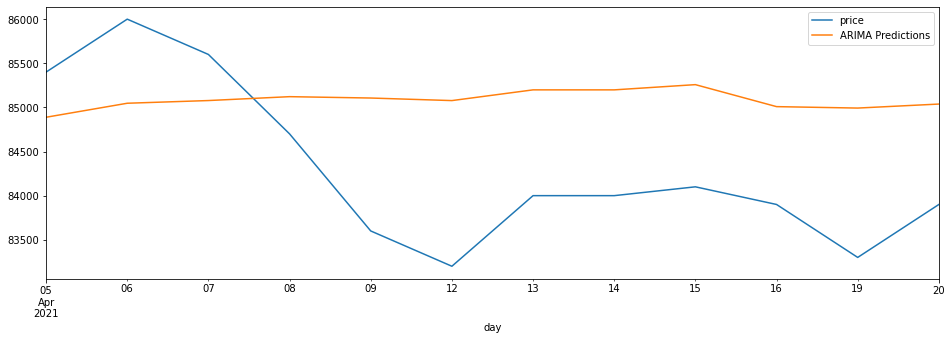

In [11]:
test_data['price'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True)
plt.show()

In [12]:
from statsmodels.tools.eval_measures import rmse

In [13]:
arima_rmse_error = rmse(test_data['price'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = samsung_df['price'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 1418033.7987513843
RMSE Error: 1190.8122432824514
Mean: 63383.77581120944


In [14]:
test_data['ARIMA_Predictions'] = arima_pred

C:\Users\admin\AppData\Local\Temp\ipykernel_35724\3839166069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [15]:
train_data

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-03-29,81600.0
2021-03-30,82200.0
2021-03-31,81400.0


In [16]:
test_data

,price,ARIMA_Predictions
day,,
2021-04-05,85400.0,84888.323899
2021-04-06,86000.0,85047.085192
2021-04-07,85600.0,85077.647791
2021-04-08,84700.0,85121.676615
2021-04-09,83600.0,85106.210994
2021-04-12,83200.0,85077.233615
2021-04-13,84000.0,85198.754678
2021-04-14,84000.0,85198.700961
2021-04-15,84100.0,85257.925133


## Prophet Forecast

In [17]:
samsung_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339 entries, 2020-01-02 to 2021-04-20
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   339 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [18]:
df_pr = samsung_df.copy()
df_pr = samsung_df.reset_index()

In [19]:
df_pr.columns = ['ds','m']

In [20]:
df_pr.head()

,ds,m
0,2020-01-02,55200.0
1,2020-01-03,55500.0
2,2020-01-06,55500.0
3,2020-01-07,55800.0
4,2020-01-08,56800.0


In [21]:
train_data_pr = df_pr.iloc[:len(samsung_df)-12]
test_data_pr = df_pr.iloc[len(samsung_df)-12:]

In [22]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [ ]:
prophet_pred.tail()

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred.index.freq = "MS"

In [ ]:
prophet_pred

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"])

In [ ]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = samsung_df['price'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

In [ ]:
rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["price"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [ ]:
print(f"Mean: {test_data['price'].mean()}")
errors

In [ ]:
test_data